<a href="https://colab.research.google.com/github/habash2125/Small-ML-projects/blob/main/heart_disease_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import keras
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model


from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [17]:
def DataLoader(FilePath,FileName):
  DataFrame = pd.read_csv(path+FileName)
  DataFrame=DataFrame.sample(len(DataFrame))

  if 'target' in DataFrame.columns:
    labels=DataFrame['target']
    DataFrame.drop(['target','fbs'],inplace=True,axis=1)
    return DataFrame,labels

In [18]:
def outliers_removal(df):
  for col in df.columns:
    q1,meadian,q3=np.percentile(df.loc[:,col],[25,50,75])  
    range=q3-q1
    min=q1-(range*1.5)
    max=q3+(range*1.5)
    df.loc[df[col] < min,col] = meadian
    df.loc[df[col] > max,col] = meadian

  return df


In [19]:
def DataScaler(data):
  scaler=StandardScaler()
  scaler.fit(data)
  ScaledData=pd.DataFrame(scaler.transform(data),columns=data.columns)
  return ScaledData


In [20]:
path="/content/drive/MyDrive/Colab Notebooks/heart disease models/"
FileName="heart.csv"

df,labels=DataLoader(path,FileName)
df=outliers_removal(df)
df=DataScaler(df)

x_train, x_test, y_train, y_test = train_test_split(df, labels,test_size=0.2)

In [21]:
test,l=DataLoader(path,FileName)

In [22]:
test.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
181,65,0,0,150,225,0,114,0,1.0,1,3,3
167,62,0,0,140,268,0,160,0,3.6,0,2,2
183,58,1,2,112,230,0,165,0,2.5,1,1,3
271,61,1,3,134,234,1,145,0,2.6,1,2,2
175,40,1,0,110,167,0,114,1,2.0,1,0,3


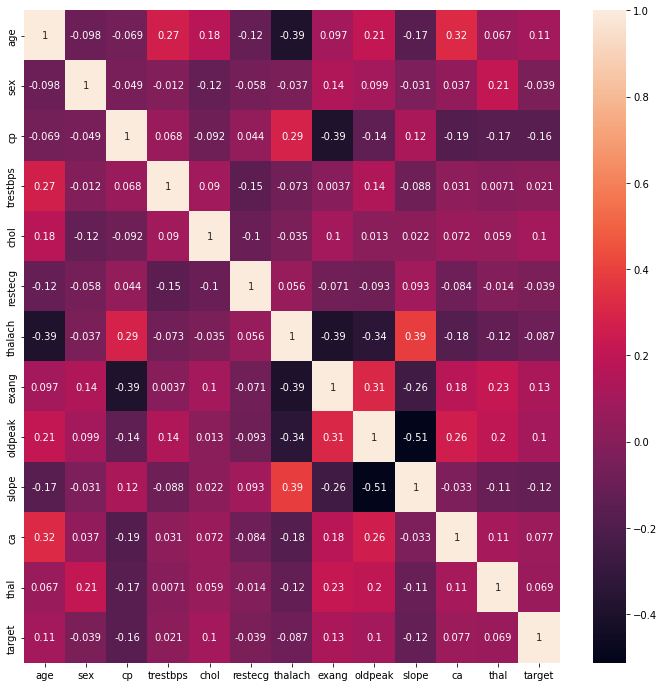

In [23]:
plt.figure(figsize=(12,12))
FullData=df
FullData["target"]=labels
sns.heatmap(data=FullData.corr(),annot=True)

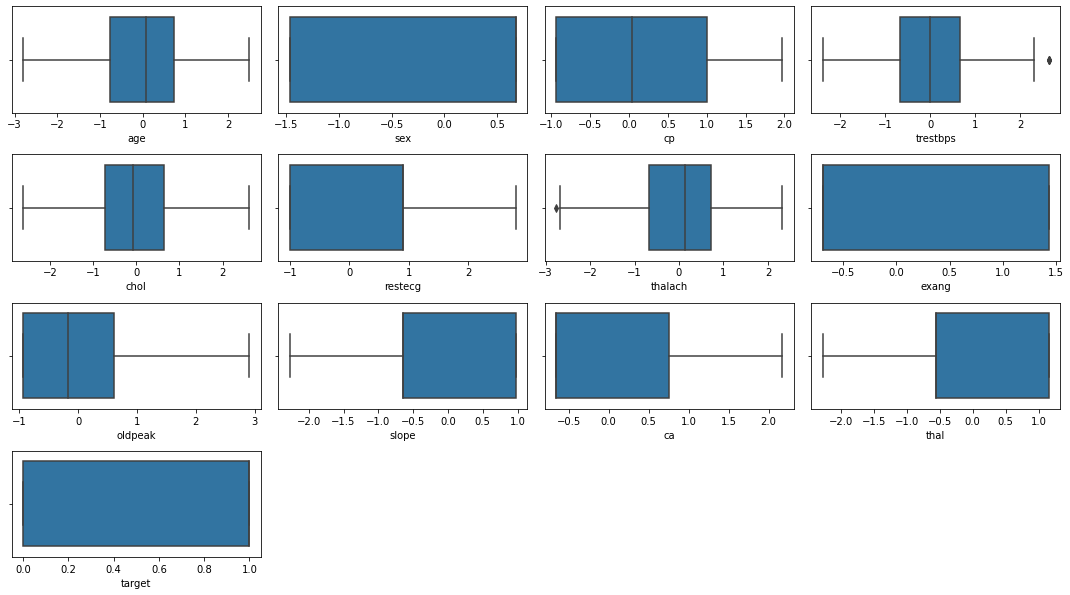

In [24]:
fig = plt.figure(figsize=(15,10))
for i ,col in enumerate (df.columns,1):
    ax=fig.add_subplot(5,4,i)
    sns.boxplot(x=df[col],ax=ax)
plt.tight_layout()

In [25]:
'''from tensorflow.keras.callbacks import ModelCheckpoint

early_stopping = ModelCheckpoint(
    monitor='val_accuracy',
    save_best_only=True
    )'''

"from tensorflow.keras.callbacks import ModelCheckpoint\n\nearly_stopping = ModelCheckpoint(\n    monitor='val_accuracy',\n    save_best_only=True\n    )"

In [26]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(11 , activation="relu"))

model.add(keras.layers.Dense(20 , activation="relu"))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(16 , activation="relu"))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(8 , activation="relu"))
model.add(keras.layers.Dropout(0.25))

#model.add(keras.layers.Dense(4 , activation="relu"))
#model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(1 , activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None,12))

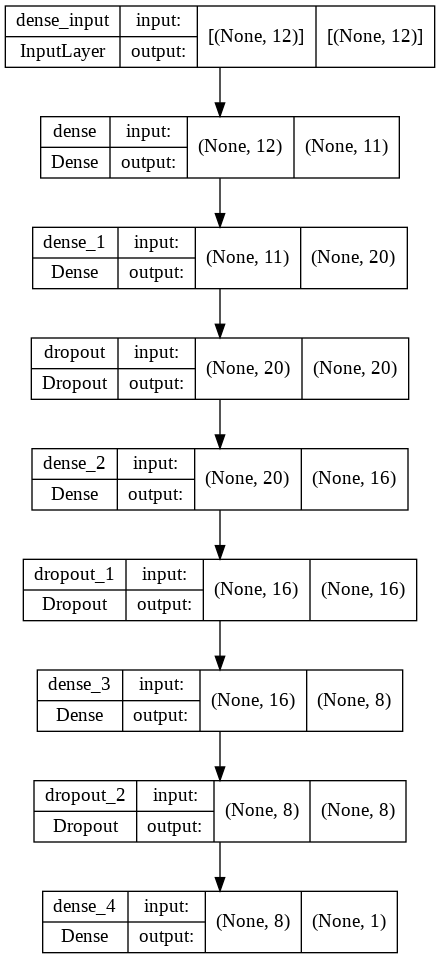

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def build_network(input_size):
  model = keras.models.Sequential()

  model.add(keras.layers.Dense(input_size , activation="relu"))
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Dense(20 , activation="relu"))
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Dense(16 , activation="relu"))
  model.add(keras.layers.Dropout(0.25))

  model.add(keras.layers.Dense(8 , activation="relu"))
  model.add(keras.layers.Dropout(0.25))

  #model.add(keras.layers.Dense(4 , activation="relu"))
  #model.add(keras.layers.Dropout(0.25))
  

  model.add(keras.layers.Dense(1 , activation="sigmoid"))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model



  

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df, labels,test_size=0.2)

In [33]:
from sklearn.decomposition import PCA
from keras.callbacks import ModelCheckpoint
pca=PCA
def dimensionality_selection(epochs, dataset,labels,minimum,maximum):
  accuracies={}

  for n in range (minimum,maximum+1):
    pca = PCA(n_components=n)
    reduced_data=pca.fit_transform(dataset)
    
    filepath=path+'ann_models/'
    model=build_network(n)
    model_checkpoint=ModelCheckpoint(
        filepath=filepath,
        monitor='accuracy',
        mode='max',
        save_best_only=True
    )
    
    history=model.fit(reduced_data,labels,epochs=epochs,validation_split=0.1,callbacks=[model_checkpoint])
    history=pd.DataFrame(history.history)
    print(history.info())
    accuracies[n]=(history)
    modelName="model"+str(n)+"pb"

    filename = filepath+modelName
    joblib.dump(model, filename)
  return accuracies,model


In [ ]:
  lst,mod=dimensionality_selection(200,x_train,y_train,8,13)

Epoch 1/200
7/7 [==============================] - 10s 606ms/step - loss: 0.7412 - accuracy: 0.5300 - val_loss: 0.7078 - val_accuracy: 0.5200
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.7583 - accuracy: 0.4286 - val_loss: 0.7014 - val_accuracy: 0.5200
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.7376 - accuracy: 0.4931 - val_loss: 0.6946 - val_accuracy: 0.6000
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.7216 - accuracy: 0.5023 - val_loss: 0.6874 - val_accuracy: 0.5600
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.7109 - accuracy: 0.5207 - val_loss: 0.6809 - val_accuracy: 0.5200
Epoch 6/200
7/7 [==============================] - 1s 167ms/step - loss: 0.7297 - accuracy: 0.5346 - val_loss: 0.6758 - val_accuracy: 0.5200
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.7060 - accuracy: 0.5207 - val_loss: 0.6726 - val_accuracy: 0.5600
Epoch 8/200
7/7 [=====

In [ ]:
lsst = list(lst)

In [ ]:
lst.keys()

dict_keys([8, 9, 10, 11, 12, 13])

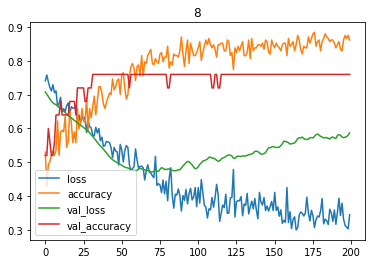

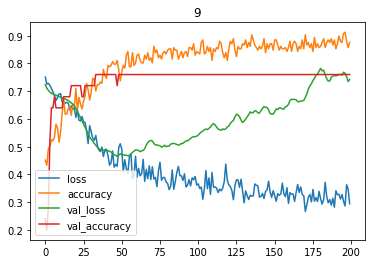

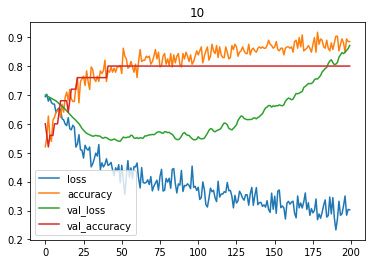

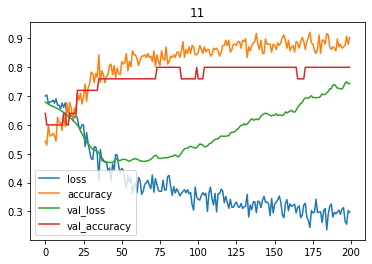

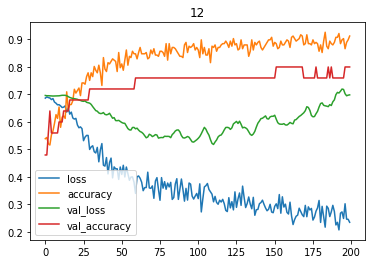

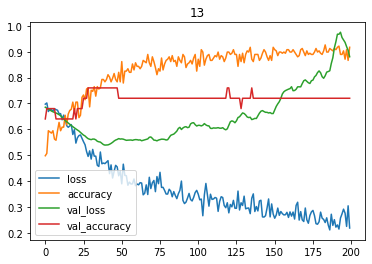

In [ ]:
matrices={}
for i in lst.keys():
  matrices[i]=[max(lst[i]['accuracy']),max(lst[i]['val_accuracy']),min(lst[i]['loss']),min(lst[i]['val_loss'])]
  lst[i].plot(title=i)

In [ ]:
matrices

{8: [0.8847926259040833,
  0.7599999904632568,
  0.2997138798236847,
  0.4715425372123718],
 9: [0.9124423861503601,
  0.7599999904632568,
  0.266654908657074,
  0.46504753828048706],
 10: [0.9170507192611694,
  0.800000011920929,
  0.2328142374753952,
  0.5397135019302368],
 11: [0.921658992767334,
  0.800000011920929,
  0.23580007255077362,
  0.46875786781311035],
 12: [0.9262672662734985,
  0.800000011920929,
  0.2075081616640091,
  0.5181829333305359],
 13: [0.9262672662734985,
  0.7599999904632568,
  0.21101787686347961,
  0.538922905921936]}

In [29]:
mood=joblib.load('/content/drive/MyDrive/Colab Notebooks/heart disease models/ann_models/model11.pb')

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.172774,0.681005,1.973123,0.523498,0.873654,-1.005832,1.074357,-0.696631,0.412164,-0.649113,0.756398,-0.561341,1
1,1.613930,0.681005,1.002577,0.655902,0.246521,-1.005832,-0.174765,-0.696631,0.989447,-0.649113,-0.658347,1.156703,1
2,0.731619,0.681005,1.002577,1.317922,0.000148,0.898962,-0.576269,1.435481,0.027308,-0.649113,-0.658347,-0.561341,1
3,-0.150692,0.681005,-0.938515,0.655902,-0.895756,-1.005832,0.226738,1.435481,2.047800,-2.274579,-0.658347,1.156703,1
4,-1.143291,-1.468418,1.002577,-0.800542,-0.022250,0.898962,-0.040931,-0.696631,-0.646189,-0.649113,0.756398,-0.561341,1
5,0.841908,-1.468418,-0.938515,0.655902,-0.067045,-1.005832,0.315961,-0.696631,0.219736,-0.649113,-0.658347,-0.561341,1
6,-0.812425,0.681005,1.002577,0.523498,0.313714,-1.005832,0.271350,-0.696631,-0.934831,0.976352,-0.658347,-0.561341,1
7,-0.260980,0.681005,1.002577,0.523498,-0.447804,0.898962,0.851300,-0.696631,-0.934831,0.976352,-0.658347,-0.561341,1
8,-0.260980,0.681005,1.973123,1.450326,1.232016,0.898962,1.252803,-0.696631,0.219736,-0.649113,-0.658347,1.156703,1
9,0.069886,0.681005,0.032031,-0.006118,0.425702,0.898962,0.226738,-0.696631,-0.934831,0.976352,-0.658347,-0.561341,1


In [30]:
test=df.iloc[5]
test.drop('target',inplace=True)
test

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


age         0.290464
sex        -1.468418
cp          0.032031
trestbps   -0.006118
chol       -0.156635
restecg    -1.005832
thalach     1.074357
exang      -0.696631
oldpeak    -0.934831
slope      -0.649113
ca          0.756398
thal       -0.561341
Name: 5, dtype: float64

In [38]:
pca=PCA(n_components=11)
pca.fit(x_test)

PCA(n_components=11)

In [42]:
test=pca.transform(x_test)
preds=np.round(mood.predict(test))

In [44]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68        26
         1.0       0.76      0.74      0.75        35

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

